In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

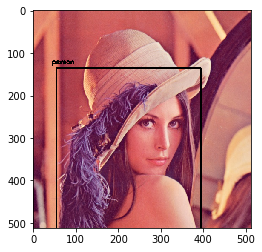

In [50]:
image = plt.imread('lena.jpg')

classes = None
with open('coco.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]


Width = image.shape[1]
Height = image.shape[0]

# read pre-trained model and config file
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')

# create input blob 
# set input blob for the network
net.setInput(cv2.dnn.blobFromImage(image, 0.00392, (416,416), (0,0,0), True, crop=False))

# run inference through the network
# and gather predictions from output layers

layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
outs = net.forward(output_layers)


class_ids = []
confidences = []
boxes = []

#create bounding box 
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.1:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])


indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.1, 0.1)

#check if is people detection
for i in indices:
    i = i[0]
    box = boxes[i]
    if class_ids[i]==0:
        label = str(classes[class_id]) 
        cv2.rectangle(image, (round(box[0]),round(box[1])), (round(box[0]+box[2]),round(box[1]+box[3])), (0, 0, 0), 2)
        cv2.putText(image, label, (round(box[0])-10,round(box[1])-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

plt.imshow(image)